In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [100]:
COVID_file = 'COVID_by_County/COVID_by_County.csv'
pop_file = 'popData.csv'
US_county_land_file = 'LND01.csv'

COVID_data = pd.read_csv(COVID_file)
pop_data = pd.read_csv(pop_file)
land_data = pd.read_csv(US_county_land_file)

In [101]:
COVID_data = COVID_data.rename(columns={'countyFIPS':'fips'})
pop_data = pop_data.rename(columns={'FIPS':'fips', 'Poverty Percent':'Poverty_pct'})
land_data = land_data.rename(columns={'STCOU':'fips','LND010190D':'land'})
land_data = land_data[['fips','land']]

In [102]:
DF = pd.merge(COVID_data, pop_data[['fips', 'POPESTIMATE2018', 'Poverty_pct']], left_on='fips', right_on='fips')
DF = pd.merge(DF,land_data,  left_on='fips', right_on='fips')
DF.Poverty_pct = DF.Poverty_pct.astype('float')

DF = DF.dropna()

DF

,Dates,fips,County Name,State,cases,deaths,POPESTIMATE2018,Poverty_pct,land
0,1/22/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94
1,1/23/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94
2,1/24/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94
3,1/25/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94
4,1/26/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94
...,...,...,...,...,...,...,...,...,...
1030688,12/5/2020,56045,Weston County,WY,419,2,6924,11.8,2400.13
1030689,12/6/2020,56045,Weston County,WY,420,2,6924,11.8,2400.13
1030690,12/7/2020,56045,Weston County,WY,422,2,6924,11.8,2400.13
1030691,12/8/2020,56045,Weston County,WY,425,2,6924,11.8,2400.13


In [103]:
# Need to fix some counties that have 0 area in the dataset.
DF.land[DF['County Name'] == 'Broomfield County and City'] = 33.55
DF.land[DF['County Name'] == 'Yakutat City and Borough'] = 9463
DF.land[DF['County Name'] == 'Denali Borough'] = 12777
DF.land[DF['County Name'] == 'Skagway Municipality'] = 464
DF.land[DF['County Name'] == 'Wrangell City and Borough'] = 3477

DF['cases_per_100k'] = DF.cases / DF.POPESTIMATE2018 * 100000
DF['deaths_per_100k'] = DF.deaths / DF.POPESTIMATE2018 * 100000
DF['pop_density'] = DF.POPESTIMATE2018 / DF.land

DF

,Dates,fips,County Name,State,cases,deaths,POPESTIMATE2018,Poverty_pct,land,cases_per_100k,deaths_per_100k,pop_density
0,1/22/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94,0.000000,0.000000,93.235538
1,1/23/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94,0.000000,0.000000,93.235538
2,1/24/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94,0.000000,0.000000,93.235538
3,1/25/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94,0.000000,0.000000,93.235538
4,1/26/2020,1000,Statewide Unallocated,AL,0,0,4887681,16.8,52422.94,0.000000,0.000000,93.235538
...,...,...,...,...,...,...,...,...,...,...,...,...
1030688,12/5/2020,56045,Weston County,WY,419,2,6924,11.8,2400.13,6051.415367,28.885038,2.884844
1030689,12/6/2020,56045,Weston County,WY,420,2,6924,11.8,2400.13,6065.857886,28.885038,2.884844
1030690,12/7/2020,56045,Weston County,WY,422,2,6924,11.8,2400.13,6094.742923,28.885038,2.884844
1030691,12/8/2020,56045,Weston County,WY,425,2,6924,11.8,2400.13,6138.070479,28.885038,2.884844


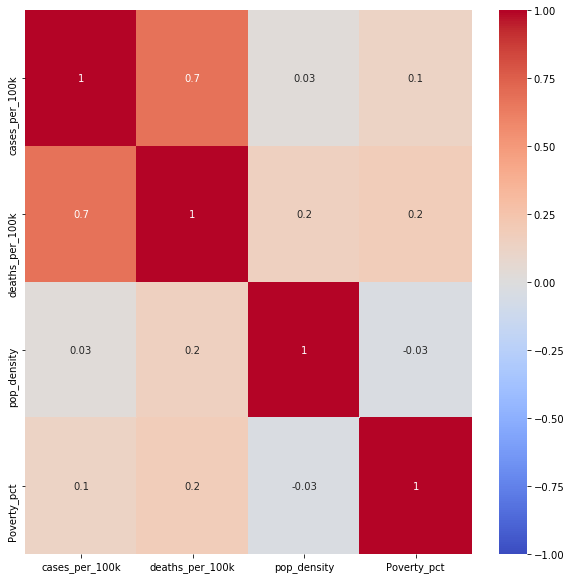

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DF[['cases_per_100k','deaths_per_100k','pop_density','Poverty_pct']].corr(), annot = True, fmt = '0.1g', cmap = 'coolwarm', vmin=-1)

In [105]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [106]:
fit = sm.OLS(DF['deaths_per_100k'],sm.add_constant(DF[['Poverty_pct','pop_density']])).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        deaths_per_100k   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                 3.218e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:15:03   Log-Likelihood:            -5.3733e+06
No. Observations:             1030693   AIC:                         1.075e+07
Df Residuals:                 1030690   BIC:                         1.075e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8668      0.118      7.330      